<a href="https://colab.research.google.com/github/matthew11xf/MATH4194/blob/main/MATH4194Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noise Level = 0.1, MSE =  0.0088
Noise Level = 0.5, MSE =  0.3372
Noise Level = 2.0, MSE =  3.7233


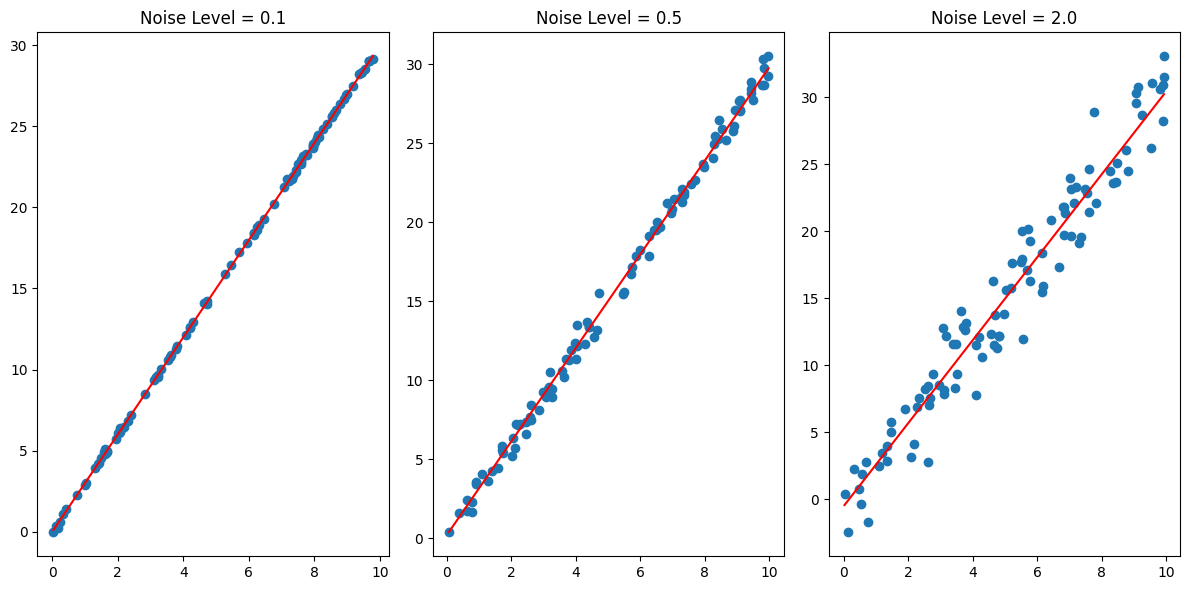

In [5]:
# Task 1: Simple Linear Regression on Simulated Data

import numpy as np
import matplotlib.pyplot as pp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to generate synthetic data
def generate_linear_data(N, var):
    # Create a random number generator
    rng = np.random.default_rng()
    # Create an ordered list of x values
    X = rng.uniform(0, 10, N)
    X.sort()
    # Calculate y values with noise
    y = 3*X + rng.normal(0, var, N)
    return X.reshape(-1, 1), y

# Different noise levels to test
noise_levels = [0.1, 0.5, 2.0]

# Initialize plot
pp.figure(figsize=(12, 6))

for i, noise in enumerate(noise_levels, 1):
    # Generate synthetic data
    X, y = generate_linear_data(100, noise)

    # Create 80/20 train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit linear model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Noise Level = {noise}, MSE = {mse: .4f}")

    # Plot data and regression line
    pp.subplot(1, 3, i)
    pp.scatter(X, y)
    pp.plot(X, model.predict(X), color='red')
    pp.title(f"Noise Level = {noise}")

pp.tight_layout()
pp.show()


Noise Level = 20.0
  Linear Model MSE = 571.0404
  Quadratic Model MSE = 471.8900
  Ridge Regression MSE = 471.8472
  Lasso Regression MSE = 471.8914



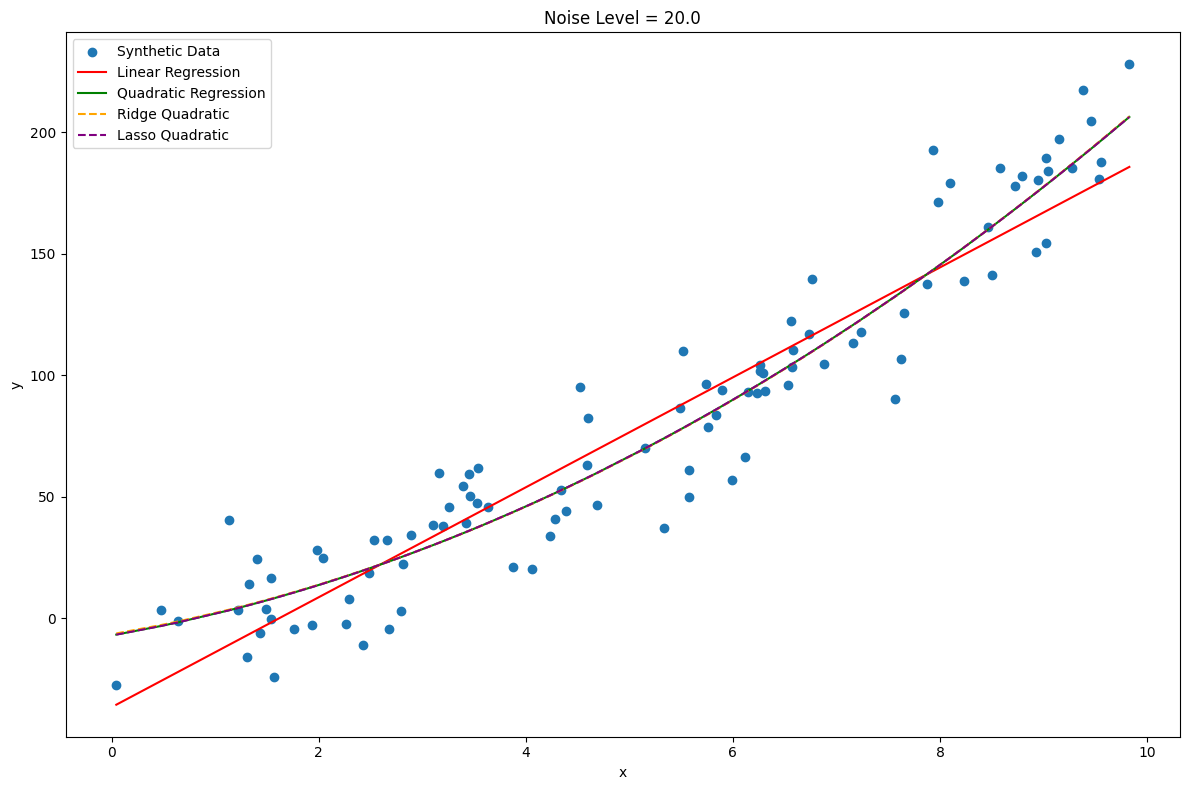

In [6]:
# Task 2: Polynomial Regression and Regularization

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Function to generate synthetic quadratic data
def generate_quadratic_data(N, var):
    # Create a random number generator
    rng = np.random.default_rng()
    # Create an ordered list of x values
    X = rng.uniform(0, 10, N)
    X.sort()
    # Calculate y values with noise
    y = 2*X**2 + 3*X + rng.normal(0, var, N)
    return X.reshape(-1, 1), y

# For this task, we'll only use one noise level
noise = 20.0
# Alpha values to test for Ridge and Lasso
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Initialize plot
pp.figure(figsize=(12, 8))

# Generate data
X, y = generate_quadratic_data(100, noise)

# Create 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear model
linear_model = LinearRegression()
# Fit the linear model
linear_model.fit(X_train, y_train)
# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Create quadratic polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create an unregularized quadratic model
quadratic_model = make_pipeline(poly_features, LinearRegression())
# Fit the quadratic model
quadratic_model.fit(X_train, y_train)
# Predict on the test set
y_pred_quadratic = quadratic_model.predict(X_test)
mse_quadratic = mean_squared_error(y_test, y_pred_quadratic)


# RIDGE REGRESSION
# Objective: ||Xw - y||^2 + alpha*||w||^2

# Create a ridge model, using 5-fold CV to select the best alpha
ridge_model = make_pipeline(poly_features, RidgeCV(alphas = alpha_values, cv = 5))
# Fit the ridge model
ridge_model.fit(X_train, y_train)

# Calculate predicted y values
y_pred_ridge = ridge_model.predict(X_test)
# Calculate mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


# LASSO REGRESSION
# Objective: (1/(2*N))*||Xw - y||^2 + alpha*|w|

# Create a lasso model, using 5-fold CV to choose the best alpha
lasso_model = make_pipeline(poly_features, LassoCV(alphas = alpha_values, cv = 5))
# Fit the lasso model
lasso_model.fit(X_train, y_train)

# Calculate predicted y values
y_pred_lasso = lasso_model.predict(X_test)
# Calculate mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print results
print(f"Noise Level = {noise}")
print(f"  Linear Model MSE = {mse_linear:.4f}")
print(f"  Quadratic Model MSE = {mse_quadratic:.4f}")
print(f"  Ridge Regression MSE = {mse_ridge:.4f}")
print(f"  Lasso Regression MSE = {mse_lasso:.4f}\n")

# Plot data and regression lines
pp.scatter(X, y, label='Synthetic Data')
pp.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
pp.plot(X, quadratic_model.predict(X), color='green', label='Quadratic Regression')
pp.plot(X, ridge_model.predict(X), color='orange', linestyle='dashed', label='Ridge Quadratic')
pp.plot(X, lasso_model.predict(X), color='purple', linestyle='dashed', label='Lasso Quadratic')
pp.title(f"Noise Level = {noise}")
pp.xlabel('x')
pp.ylabel('y')
pp.legend()
pp.tight_layout()
pp.show()


Noise Level = 20.0
  Linear Model MSE = 727.7293
  Quadratic Model MSE = 517.9986
  Ridge Regression MSE = 519.9088
  Lasso Regression MSE = 570.3950



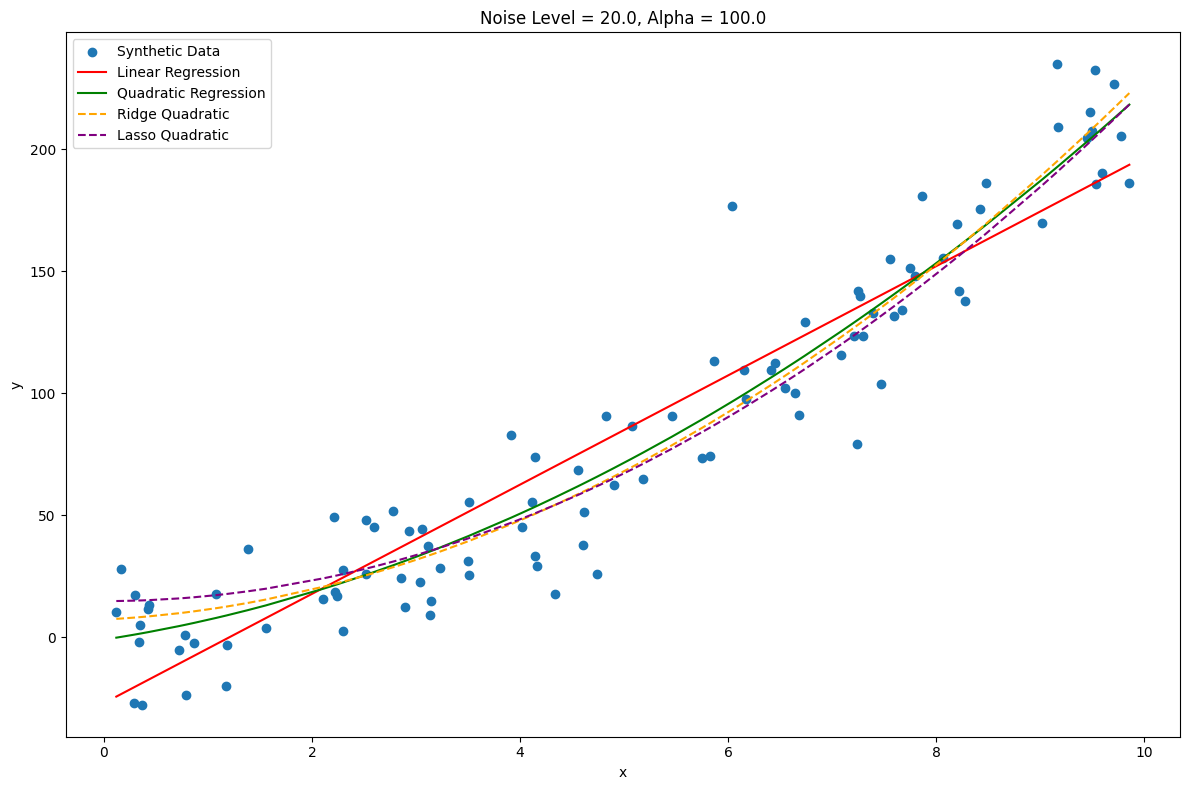

In [9]:
# Task 2: Polynomial Regression and Regularization
# This section uses a large alpha for the Ridge and Lasso models

# For this task, we'll only use one noise level
noise = 20.0
# And, we'll only use one large alpha value
large_alpha = 100.0

# Initialize plot
pp.figure(figsize=(12, 8))

# Generate data
X, y = generate_quadratic_data(100, noise)

# Create 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear model
linear_model = LinearRegression()
# Fit the linear model
linear_model.fit(X_train, y_train)
# Predict on the test set
y_pred_linear = linear_model.predict(X_test)
# Calculate mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Create quadratic polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Create an unregularized quadratic model
quadratic_model = make_pipeline(poly_features, LinearRegression())
# Fit the quadratic model
quadratic_model.fit(X_train, y_train)
# Predict on the test set
y_pred_quadratic = quadratic_model.predict(X_test)
mse_quadratic = mean_squared_error(y_test, y_pred_quadratic)


# RIDGE REGRESSION
# Objective: ||Xw - y||^2 + alpha*||w||^2

# Create a ridge model with a large alpha
ridge_model = make_pipeline(poly_features, Ridge(alpha=large_alpha))
# Fit the ridge model
ridge_model.fit(X_train, y_train)

# Calculate predicted y values
y_pred_ridge = ridge_model.predict(X_test)
# Calculate mean squared error
mse_ridge = mean_squared_error(y_test, y_pred_ridge)


# LASSO REGRESSION
# Objective: (1/(2*N))*||Xw - y||^2 + alpha*|w|

# Create a lasso model with a large alpha
lasso_model = make_pipeline(poly_features, Lasso(alpha=large_alpha))
# Fit the lasso model
lasso_model.fit(X_train, y_train)

# Calculate predicted y values
y_pred_lasso = lasso_model.predict(X_test)
# Calculate mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Print results
print(f"Noise Level = {noise}")
print(f"  Linear Model MSE = {mse_linear:.4f}")
print(f"  Quadratic Model MSE = {mse_quadratic:.4f}")
print(f"  Ridge Regression MSE = {mse_ridge:.4f}")
print(f"  Lasso Regression MSE = {mse_lasso:.4f}\n")

# Plot data and regression lines
pp.scatter(X, y, label='Synthetic Data')
pp.plot(X, linear_model.predict(X), color='red', label='Linear Regression')
pp.plot(X, quadratic_model.predict(X), color='green', label='Quadratic Regression')
pp.plot(X, ridge_model.predict(X), color='orange', linestyle='dashed', label='Ridge Quadratic')
pp.plot(X, lasso_model.predict(X), color='purple', linestyle='dashed', label='Lasso Quadratic')
pp.title(f"Noise Level = {noise}, Alpha = {large_alpha}")
pp.xlabel('x')
pp.ylabel('y')
pp.legend()
pp.tight_layout()
pp.show()


In [10]:
# Task 3: Classification Using Real Data

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

data = load_breast_cancer()
X = data.data
y = data.target

# Generate 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# We will make models with several kernels:
# RBF (Gaussian); Linear; and Polynomial of Degrees 2, 3, 4, 5
# We let RBF have "degree" 0
kernel_degrees = [0, 1, 2, 3, 4, 5]
# Train a SVM model for each kernel type
for kernel_degree in kernel_degrees:
    if kernel_degree == 0:
        kernel_type = 'rbf'
        print("Gaussian Kernel:")
    elif kernel_degree == 1:
        kernel_type = 'linear'
        print("Linear Kernel:")
    else:
        kernel_type = 'poly'
        print(f"Degree {kernel_degree} Polynomial Kernel:")
    # Create the kernel SVM model
    # Degree is ignored for RBF and linear kernels
    kernel_SVM = make_pipeline(StandardScaler(), SVC(kernel = kernel_type, degree = kernel_degree))
    # Fit the model to the data
    kernel_SVM.fit(X_train, y_train)
    # Calculate predicted labels
    y_predict = kernel_SVM.predict(X_test)

    # Assemble test results
    test_results = list(zip(y_predict, y_test))
    # Count numbers of correct/wrong test labels
    num_correct = 0
    num_wrong = 0
    for predict, test in test_results:
        if predict == test:
            num_correct += 1
        else:
            num_wrong += 1
    # Calculate the % rate of correct labels
    percent_correct = num_correct/len(test_results)
    # Print out results
    print(f"    Labels Predicted Correctly: {num_correct}/{len(test_results)}")
    print(f"    Percent Labeled Correctly = {percent_correct: .1%}")


Gaussian Kernel:
    Labels Predicted Correctly: 113/114
    Percent Labeled Correctly =  99.1%
Linear Kernel:
    Labels Predicted Correctly: 111/114
    Percent Labeled Correctly =  97.4%
Degree 2 Polynomial Kernel:
    Labels Predicted Correctly: 87/114
    Percent Labeled Correctly =  76.3%
Degree 3 Polynomial Kernel:
    Labels Predicted Correctly: 97/114
    Percent Labeled Correctly =  85.1%
Degree 4 Polynomial Kernel:
    Labels Predicted Correctly: 85/114
    Percent Labeled Correctly =  74.6%
Degree 5 Polynomial Kernel:
    Labels Predicted Correctly: 89/114
    Percent Labeled Correctly =  78.1%
